Importamos las liberias

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from skimage import io
import random

Primera exploración de las variables

In [2]:
df_train = pd.read_csv("data/train.csv")
df_train.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0


In [3]:
imgs = os.listdir("data/image/train")
imgs[:3]

['ISIC_0015719.jpg', 'ISIC_0052212.jpg', 'ISIC_0068279.jpg']

In [5]:
df_test = pd.read_csv("data/test.csv")
df_test.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge
0,ISIC_0052060,IP_3579794,male,70.0,NaN
1,ISIC_0052349,IP_7782715,male,40.0,lower extremity
2,ISIC_0058510,IP_7960270,female,55.0,torso
3,ISIC_0073313,IP_6375035,female,50.0,torso
4,ISIC_0073502,IP_0589375,female,45.0,lower extremity


In [7]:
df_train.shape, df_test.shape

((33126, 8), (10982, 5))

In [6]:
df_sub = pd.read_csv("data/sample_submission.csv")
df_sub.head()

,image_name,target
0,ISIC_0052060,0
1,ISIC_0052349,0
2,ISIC_0058510,0
3,ISIC_0073313,0
4,ISIC_0073502,0


Vamos a ver las primeras imagenes


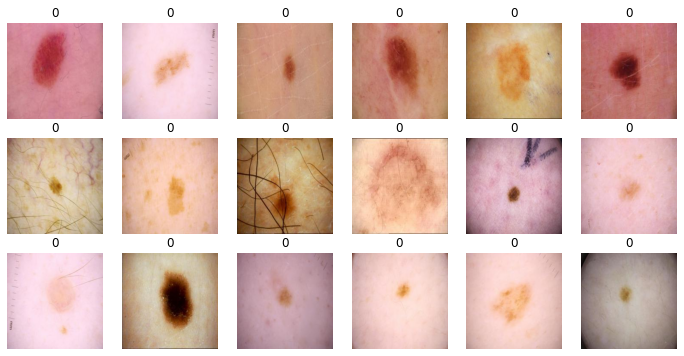

In [23]:
r, c = 3,6
fig = plt.figure(figsize=(2*c,2*r))
for _r in range(r):
    for _c in range(c):
        plt.subplot(r,c, _r*c + _c + 1)
        ix = random.randint(0,len(imgs)-1)
        name_image = df_train["image_name"].values[ix]
        img = io.imread(f"data/image/train/{name_image}.jpg")
        plt.imshow(img)
        label = df_train["target"].values[ix]
        plt.title(label)
        plt.axis(False)
plt.show()

<AxesSubplot:>

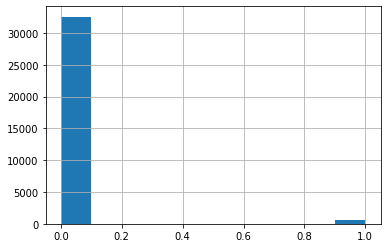

In [22]:
df_train["target"].hist()

In [9]:
df_train["target"].value_counts()

0    32542
1      584
Name: target, dtype: int64

<AxesSubplot:>

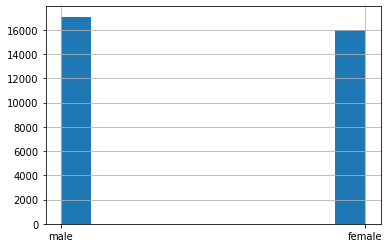

In [10]:
df_train["sex"].hist()

<AxesSubplot:>

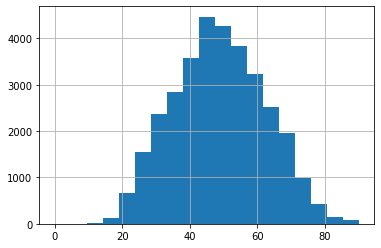

In [11]:
df_train["age_approx"].hist(bins=len(df_train["age_approx"].unique()))

asasdas


<AxesSubplot:>

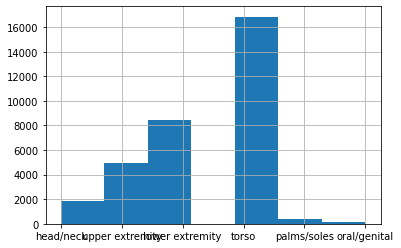

In [12]:
df_train["anatom_site_general_challenge"].hist(bins=len(df_train["anatom_site_general_challenge"].unique()))

In [13]:
from sklearn.model_selection import train_test_split
train_split, val_split = train_test_split(df_train, shuffle=True, test_size=0.33, random_state=42, stratify=df_train["target"])
train_split.shape, val_split.shape

((22194, 8), (10932, 8))

In [14]:
_, subset = train_test_split(train_split, shuffle=True, test_size=0.1, random_state=42, stratify=train_split["target"])
subset.shape

(2220, 8)

In [19]:
train_split.to_csv("data/train_split.csv", index=False)
val_split.to_csv("data/val_split.csv", index=False)
subset.to_csv("data/subset.csv", index=False)